In [6]:
%autosave 20

Autosaving every 20 seconds


In [7]:
# Import Python Packages
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [8]:
# pip install plotly
import plotly.express as px


In [9]:
# imports

data_ch = pd.read_csv('data_ch.csv')


# Criacao de modelo

# CHINA

In [10]:
pais = data_ch

In [11]:
#esperado 3749 7 for data transformed

pais.shape

(1920, 7)

In [12]:
pais.tail()

,Date,Province/State,Country,Confirmed,Deaths,Recovered,dayCount
1915,03/23/2020,Beijing,Mainland China,537.0,8.0,401.0,61
1916,03/23/2020,Anhui,Mainland China,990.0,6.0,984.0,61
1917,03/23/2020,Yunnan,Mainland China,176.0,2.0,172.0,61
1918,03/23/2020,Inner Mongolia,Mainland China,75.0,1.0,74.0,61
1919,03/23/2020,Zhejiang,Mainland China,1238.0,1.0,1221.0,61


In [13]:
data_model = pais.groupby(['Country','dayCount']).agg({'Confirmed':  ['sum'],'Recovered':  ['sum'], 'Deaths': ['sum'] })
data_model.columns = ['Confirmed', 'Recovered', 'Deaths']
data_model = data_model.reset_index()
data_model.shape

(62, 5)

In [14]:
data_model.head()


,Country,dayCount,Confirmed,Recovered,Deaths
0,Mainland China,0,547.0,28.0,17.0
1,Mainland China,1,639.0,30.0,18.0
2,Mainland China,2,916.0,36.0,26.0
3,Mainland China,3,1399.0,39.0,42.0
4,Mainland China,4,2062.0,49.0,56.0


## ----------------------------------------------------------------

## TRAIN  TEST

# RANDON FOREST REGRESSOR

In [15]:
X = data_model.iloc[:, 1:2].values
y = data_model.iloc[:, 4].values

y = y.reshape(-1, 1)


In [16]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor



X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                                  test_size = 0.3,
                                                                  random_state = 0)


previsor = RandomForestRegressor()


random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}


rf_search = RandomizedSearchCV(previsor,
                                random_grid,
                                scoring='neg_mean_squared_error',
                                cv = 3,
                                return_train_score=True,
                                n_jobs = -1,
                                n_iter = 40, 
                                verbose=1  )


In [17]:
rf_search.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.1s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [18]:
rf_search.best_params_

{'n_estimators': 130,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [19]:
rf_confirmed = rf_search.best_estimator_

In [20]:
rf_confirmed

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=110, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=130, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [21]:
future = np.arange(min(X),100, 1)
future = future.reshape(-1, 1)



In [22]:
rf_pred_future = rf_confirmed.predict(future)

In [23]:
rf_test_pred = rf_confirmed.predict(X_test)

In [24]:
rf_test_pred

array([2203.46923077, 2428.00769231, 2510.06923077, 3124.34615385,
       3174.66923077, 2754.1       ,  370.70769231, 3063.77692308,
         26.42307692, 2990.06153846, 1723.26153846,   56.6       ,
        224.27692308, 2925.65384615, 2105.65384615, 2690.27692308,
       3257.25384615, 1851.22307692,  141.24615385])

In [25]:
rf_pred_future

array([  21.18461538,   21.61538462,   26.42307692,   40.39230769,
         56.6       ,   94.62307692,  119.79230769,  141.24615385,
        177.61538462,  195.76153846,  224.27692308,  370.70769231,
        452.18461538,  487.5       ,  547.26923077,  621.08461538,
        698.74615385,  790.68461538,  875.51538462,  993.88461538,
       1082.36153846, 1146.18461538, 1314.06923077, 1489.82307692,
       1627.65384615, 1709.90769231, 1723.26153846, 1851.22307692,
       2105.65384615, 2194.05384615, 2203.46923077, 2387.14615385,
       2428.00769231, 2510.06923077, 2690.27692308, 2754.1       ,
       2767.3       , 2784.9       , 2827.05384615, 2862.90769231,
       2898.42307692, 2925.65384615, 2967.55384615, 2990.06153846,
       3027.50769231, 3063.77692308, 3096.87692308, 3113.94615385,
       3124.34615385, 3154.53076923, 3166.44615385, 3174.66923077,
       3191.51538462, 3197.85384615, 3211.79230769, 3222.96153846,
       3234.76153846, 3242.93076923, 3247.79230769, 3253.65384

In [26]:
scoreTreino = rf_confirmed.score(X_train, y_train)
scoreTeste = rf_confirmed.score(X_test, y_test)


In [27]:
scoreTreino

0.9997092110787745

In [28]:
scoreTeste

0.9978550947137672

MAE: 32.82267206477735
MSE: 2914.275789473685


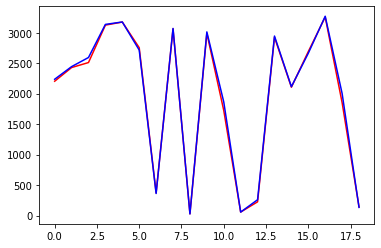

In [29]:
#testando
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


plt.plot(rf_test_pred, color = 'red')
plt.plot(y_test, color = 'blue')

print('MAE:', mean_absolute_error(rf_test_pred, y_test))
print('MSE:', mean_squared_error(rf_test_pred, y_test))



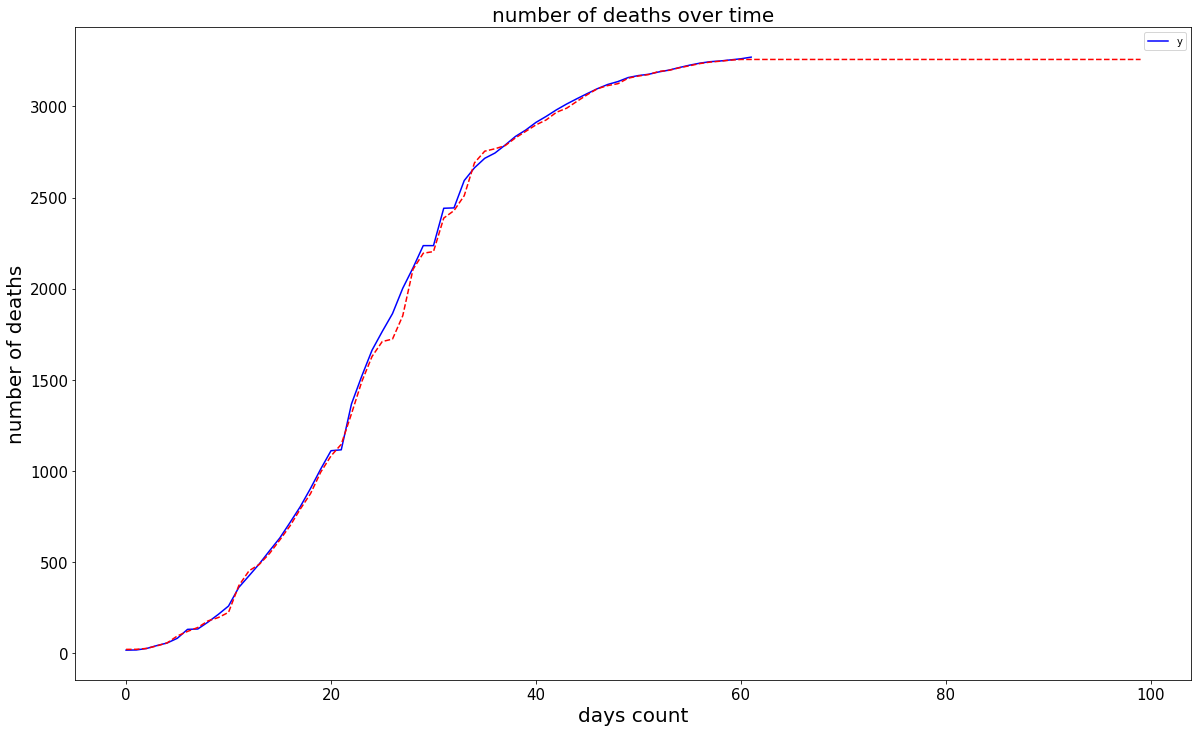

In [30]:
plt.figure(figsize = (20,12))

plt.plot(X,y, color = 'blue')
plt.plot(future, rf_pred_future, linestyle ='dashed', color = 'red')
plt.title('number of deaths over time', size = 20)
plt.xlabel('days count', size = 20)
plt.legend('predict')
plt.ylabel('number of deaths', size = 20)
plt.legend('y')
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# --------------------------------------------------------------------------------

# SVM REGRESSOR

In [31]:
data_model.head()

,Country,dayCount,Confirmed,Recovered,Deaths
0,Mainland China,0,547.0,28.0,17.0
1,Mainland China,1,639.0,30.0,18.0
2,Mainland China,2,916.0,36.0,26.0
3,Mainland China,3,1399.0,39.0,42.0
4,Mainland China,4,2062.0,49.0,56.0


In [32]:
X = data_model.iloc[:, 1].values
y = data_model.iloc[:, 4].values

In [33]:
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61])

In [34]:
y

array([  17.,   18.,   26.,   42.,   56.,   82.,  131.,  133.,  171.,
        213.,  259.,  361.,  425.,  490.,  562.,  632.,  717.,  804.,
        904., 1011., 1111., 1116., 1368., 1520., 1662., 1765., 1863.,
       2002., 2114., 2236., 2236., 2441., 2443., 2593., 2663., 2715.,
       2744., 2788., 2835., 2870., 2912., 2945., 2981., 3013., 3042.,
       3070., 3097., 3120., 3136., 3158., 3169., 3176., 3189., 3199.,
       3213., 3226., 3237., 3245., 3249., 3255., 3261., 3270.])

In [35]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 3)

In [37]:
#svm model
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, train_test_split

kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]

svm_grid = {'kernel' : kernel , 'C' : c, 'gamma': gamma, 'epsilon': epsilon, 'shrinking': shrinking}

previsor = SVR()

svm_search = RandomizedSearchCV(previsor, 
                                svm_grid,
                                scoring='neg_mean_squared_error',
                                cv=3, 
                                return_train_score=True,
                                n_jobs = -1, 
                                n_iter=40, 
                                verbose=1 )



In [38]:
svm_search.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 113 out of 120 | elapsed:  1.4min remaining:    5.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  4.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [52]:
svm_search.best_params_

{'shrinking': True, 'kernel': 'poly', 'gamma': 0.01, 'epsilon': 1, 'C': 1}

In [53]:
svm_confirmed = svm_search.best_estimator_

In [54]:
future = np.arange(min(X),100, 1)
future = future.reshape(-1, 1)



In [55]:
svm_confirmed

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [56]:
svm_pred_future = svm_confirmed.predict(future)

In [57]:
svm_test_pred = svm_confirmed.predict(X_test)

In [58]:
svm_test_pred

array([2716.26650848, 1062.88127647, 4050.21190567, 1005.51152352,
       1770.27321503, 1162.86405085,  974.24619186, 1317.29679709,
        998.10948387, 1538.01646556, 1217.4402835 , 1441.01660268,
       2409.02662387,  971.84723658, 1647.51614807,  982.34266594,
       3320.50336995, 3596.66731411, 1396.96736458])

In [59]:
svm_pred_future

array([  970.83715015,   970.85293275,   970.96341095,   971.26328036,
         971.84723658,   972.80997522,   974.24619186,   976.25058213,
         978.91784162,   982.34266594,   986.61975068,   991.84379146,
         998.10948387,  1005.51152352,  1014.14460602,  1024.10342695,
        1035.48268194,  1048.37706658,  1062.88127647,  1079.09000722,
        1097.09795443,  1116.9998137 ,  1138.89028064,  1162.86405085,
        1189.01581994,  1217.4402835 ,  1248.23213715,  1281.48607647,
        1317.29679709,  1355.75899459,  1396.96736458,  1441.01660268,
        1488.00140447,  1538.01646556,  1591.15648156,  1647.51614807,
        1707.19016069,  1770.27321503,  1836.86000669,  1907.04523127,
        1980.92358437,  2058.5897616 ,  2140.13845856,  2225.66437086,
        2315.26219409,  2409.02662387,  2507.05235579,  2609.43408546,
        2716.26650848,  2827.64432045,  2943.66221698,  3064.41489367,
        3189.99704613,  3320.50336995,  3456.02856074,  3596.66731411,
      

In [60]:
scoreTreino = svm_confirmed.score(X_train, y_train)
scoreTeste = svm_confirmed.score(X_test, y_test)


In [61]:
scoreTreino

0.65369586583669

In [62]:
scoreTeste

0.5949648838857797

MAE: 675.2966793816285
MSE: 538034.9623227331


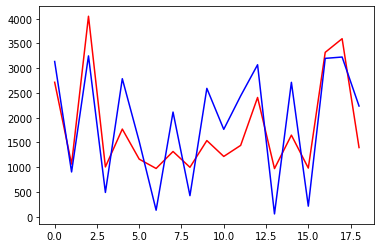

In [63]:
#  Y X PREVISOES
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


plt.plot(svm_test_pred, color = 'red')
plt.plot(y_test, color = 'blue')

print('MAE:', mean_absolute_error(svm_test_pred, y_test))
print('MSE:', mean_squared_error(svm_test_pred, y_test))



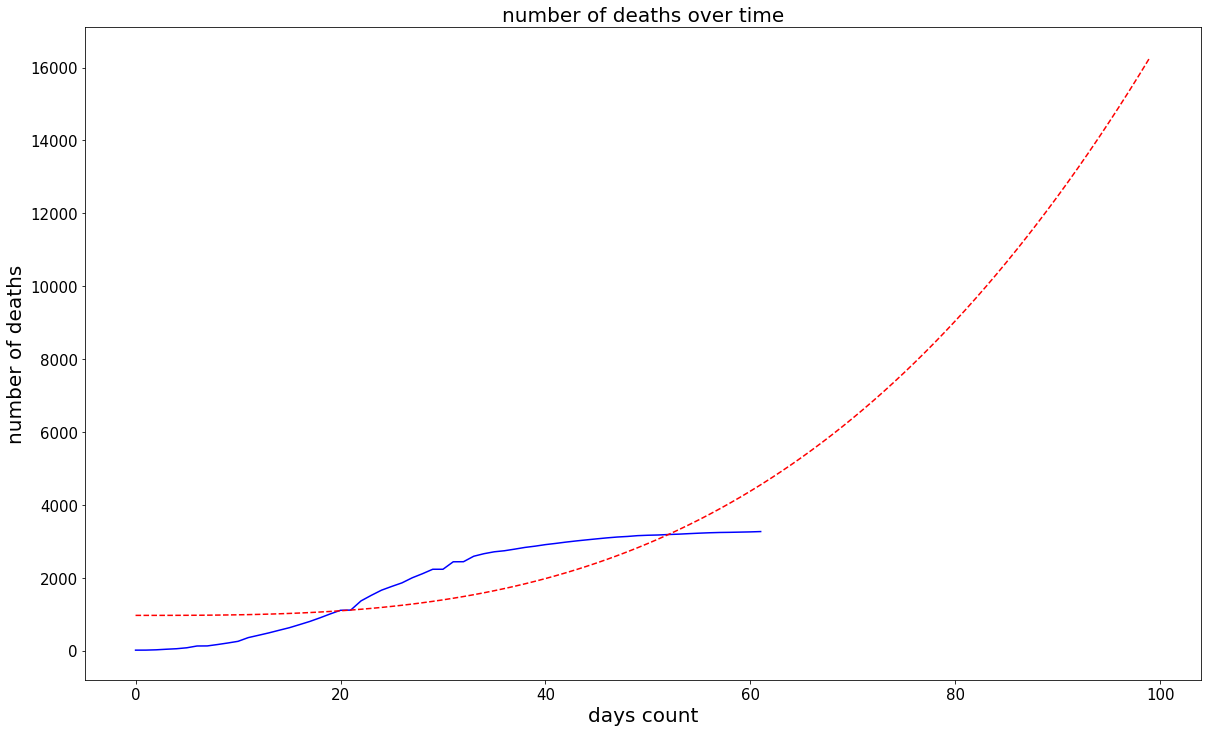

In [51]:
plt.figure(figsize = (20,12))

plt.plot(X,y, color = 'blue')
plt.plot(future, svm_pred_future, linestyle ='dashed', color = 'red')
plt.title('number of deaths over time', size = 20)
plt.xlabel('days count', size = 20)
plt.ylabel('number of deaths', size = 20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()